#### Import required libraries

In [109]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

#### Import data from csv file

In [110]:
cars = pd.read_csv("carAuction.csv")

#### Display head of the dataset

In [111]:
cars.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,ADESA,WHITE,No,2871,LARGE TRUCK,FORD,5300,8,75419,869,Alloy
1,ADESA,GOLD,Yes,1840,VAN,FORD,3600,8,82944,2322,Alloy
2,ADESA,RED,No,8931,SMALL SUV,CHRYSLER,7500,4,57338,588,Alloy
3,ADESA,GOLD,No,8320,CROSSOVER,FORD,8500,5,55909,1169,Alloy
4,ADESA,GREY,No,11520,LARGE TRUCK,FORD,10100,5,86702,853,Alloy


#### Divide columns into feature variables and target variables

In [112]:
cols = ['Color','MMRCurrentAuctionAveragePrice','Size','TopThreeAmericanName','VehBCost','VehicleAge','VehOdo','WarrantyCost','WheelType']

In [113]:
feature = cars[cols]

In [114]:
target = cars.IsBadBuy

#### Transform non-numerical labels to numerical labels using LabelEncoder

In [115]:
target = LabelEncoder().fit_transform(y) #fit_transform returns encoded labels

In [116]:
#y has numerics, 0 and 1 in this case as it is a binary
target

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [117]:
feature = feature.apply(LabelEncoder().fit_transform) #fit_transform returns encoded labels

In [118]:
#y has numerics assigned based on their values
feature.head()

,Color,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,14,493,4,1,440,7,5060,35,0
1,4,53,11,1,114,7,6879,184,0
2,12,4458,7,0,889,3,1750,8,0
3,4,4129,1,1,1089,4,1594,75,0
4,6,5188,4,1,1377,4,7712,34,0


#### Split the dataset using train_test_split into trainset and testset

In [119]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=1) # 70% training and 30% test

#### Number of rows and columns in test data and train data

In [120]:
feature_train.shape

(7000, 9)

In [121]:
target_train.shape

(7000,)

In [122]:
feature_test.shape

(3000, 9)

In [123]:
target_test.shape

(3000,)

In [126]:
target_train

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

#### Proportion of target variable for both training and testing datasets

In [127]:
print("Yes",target_train.sum() / target_train.size) # As the target variable is binary, total sum divided by count gives "yes" percentage in the data
print("No ",1- (target_train.sum() / target_train.size)) # 1-"yes" gives "No"


Yes 0.132
No  0.868


In [128]:
print("Yes",target_test.sum() / target_test.size)
print("No ",1-(target_test.sum() / target_test.size))


Yes 0.12366666666666666
No  0.8763333333333333


#### Create Decision Tree Model using Scikit-learn

In [157]:
# Create Decision Tree classifer object, use max_leaf_nodes and max_depth to change decision tree depth and detail
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_leaf_nodes=8, max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(feature_train,target_train)

#Predict the response for test dataset
test_pred = clf.predict(feature_test)

#Predict the response for train dataset
train_pred = clf.predict(feature_train)

#### Accuracy of the testset and trainset

In [158]:
print("Trainset Accuracy:",metrics.accuracy_score(target_train, train_pred))
print("Testset Accuracy:",metrics.accuracy_score(target_test, test_pred))

Trainset Accuracy: 0.89
Testset Accuracy: 0.9016666666666666


#### Confusion matrix of trainset

In [159]:
metrics.confusion_matrix(target_train,train_pred)

array([[5994,   82],
       [ 688,  236]], dtype=int64)

#### Confusion matrix of testset

In [160]:
metrics.confusion_matrix(target_test,test_pred)

array([[2603,   26],
       [ 269,  102]], dtype=int64)

#### Precision, recall and fscore of trainset

In [161]:
precision, recall, fscore, support = score(target_train, train_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.89703682 0.74213836]
recall: [0.98650428 0.25541126]
fscore: [0.93964571 0.38003221]
support: [6076  924]


#### Precision, recall and fscore of testset

In [162]:
predicted = y_pred
y_test = y_test

precision, recall, fscore, support = score(target_test, test_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.90633705 0.796875  ]
recall: [0.99011031 0.27493261]
fscore: [0.94637339 0.40881764]
support: [2629  371]


#### Text representation of the model

In [163]:
feature_names = cols
target_names = cars['IsBadBuy'].unique().tolist()

text_representation = tree.export_text(clf,feature_names = feature_names)
print(text_representation)

|--- WheelType <= 2.50
|   |--- VehicleAge <= 3.50
|   |   |--- MMRCurrentAuctionAveragePrice <= 2733.50
|   |   |   |--- class: 0
|   |   |--- MMRCurrentAuctionAveragePrice >  2733.50
|   |   |   |--- class: 0
|   |--- VehicleAge >  3.50
|   |   |--- VehBCost <= 190.00
|   |   |   |--- class: 0
|   |   |--- VehBCost >  190.00
|   |   |   |--- class: 0
|--- WheelType >  2.50
|   |--- VehOdo <= 8735.50
|   |   |--- VehOdo <= 1382.00
|   |   |   |--- class: 1
|   |   |--- VehOdo >  1382.00
|   |   |   |--- class: 1
|   |--- VehOdo >  8735.50
|   |   |--- class: 1



#### Plot decision tree

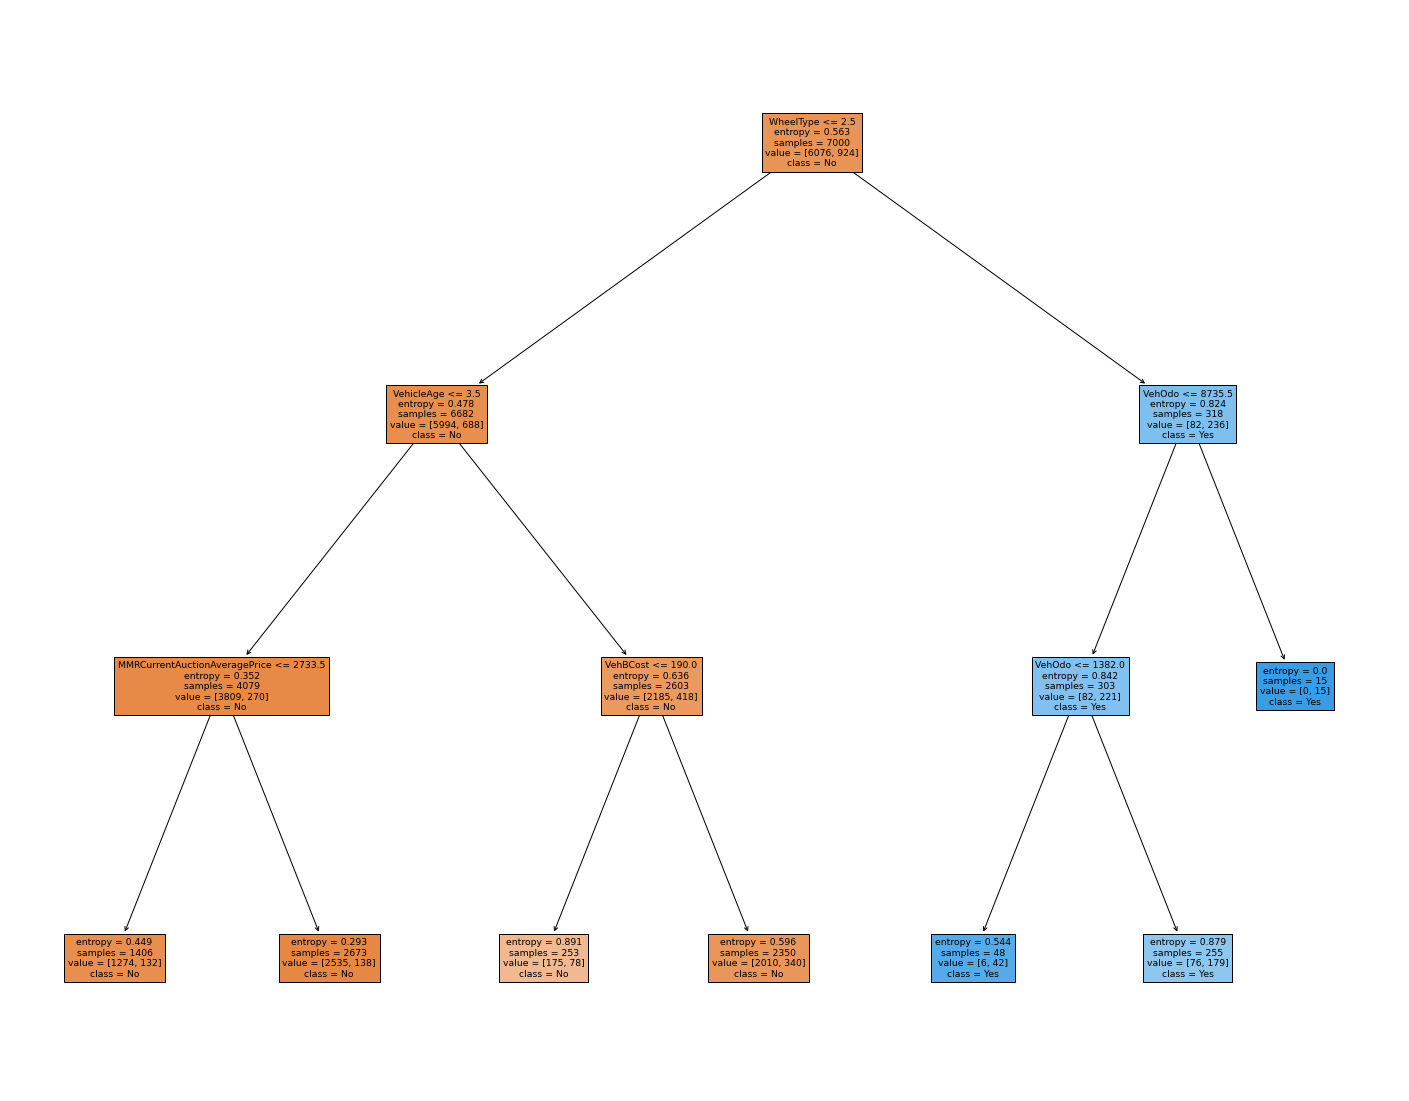

In [164]:
fig = plt.figure(figsize=(25,20))
dtree = tree.plot_tree(clf, 
                   feature_names=cols,  
                   class_names=target_names,
                   filled=True)